## 5-HT differentially regulates sensory top-down predictive signals across reward expectations


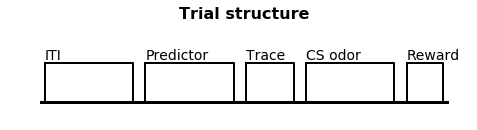

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Plot figure 1
plt.figure(figsize=[8,1.5])
plt.plot([-.05,5],[0,0],'k-',linewidth=3)
eventT = np.array([[0,1.1],[1.25,2.35],[2.5,3.1],[3.25,4.35],[4.5,4.95]])
eventStr = ["ITI","Predictor","Trace","CS odor","Reward"]
for i in range(0,5):
        plt.plot(eventT[i,[0,1,1,0,0]],[1,1,0,0,1],'k',linewidth=2)
        plt.text(eventT[i,0], 1.1, eventStr[i], size=14)
        
plt.ylim([-.1,2])
plt.box(False)
plt.axis("Off")
plt.title("Trial structure",size=16,weight='bold')
plt.show()

#### Fig 1. Trial structure  
After an inter-trial interval (1000 ms), each trial contains a predictor stimulus (odor or LED, see below; 1000 ms), followed by a trace period (500 ms), a conditioned stimulus (odor, 1000 ms), and depending on contingencies, an unconditioned stimulus (water reward).  
___

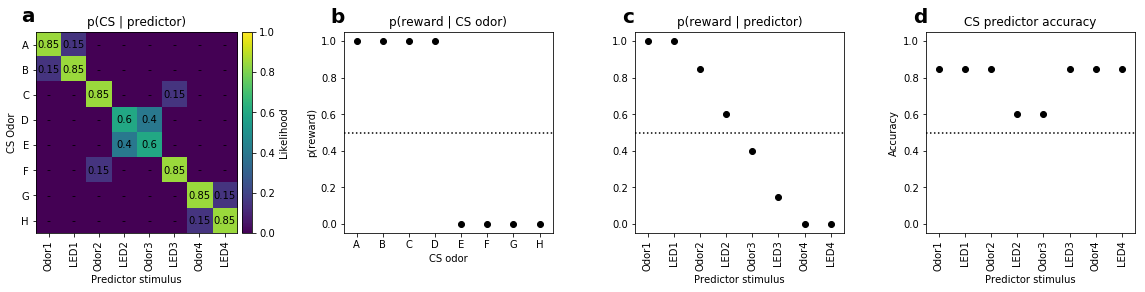

In [16]:
probMat = np.zeros([8,8])
lowProb = [1,0,5,4,3,2,7,6]
for i in np.arange(0,8,1):
    probMat[i,i] = .85
    probMat[i,lowProb[i]] = .15
    
midProb = [3,4]
for i in np.arange(0,2,1):
    probMat[midProb[i],midProb[i]] = 0.6
    probMat[midProb[(i+1)%2],midProb[i]] = 0.4

# Plot
plt.figure(figsize=[20,3.7])
predStr = ["Odor1","LED1","Odor2","LED2","Odor3","LED3","Odor4","LED4"]
csStr = ["A","B","C","D","E","F","G","H"]
plt.subplot(1,4,1)
plt.imshow(probMat,cmap="viridis",vmin=0, vmax=1)
plt.ylabel("CS Odor")
plt.xlabel("Predictor stimulus")
plt.title("p(CS | predictor)")
plt.xticks(range(0,8),predStr,rotation='vertical')
plt.yticks(range(0,8),csStr)

# Print probabilities
for i in np.linspace(0,7,8):
    for j in np.linspace(0,7,8):
        if probMat[int(i),int(j)] == 0:
            plt.text(i, j, '-', va='center', ha='center',size=11,color='k')
        else:
            plt.text(i, j, probMat[int(i),int(j)], va='center', ha='center',size=10,color='k')
plt.colorbar(pad=0.02,label="Likelihood")
plt.text(-0.075, 1.05, "a", transform=plt.gca().transAxes, size=20, weight='bold')

# p(reward | CS odor) vector
testMat = np.zeros([8,1])
testMat[0:4,0] = 1

# Plot 2
plt.subplot(1,4,2)
plt.gca().set_aspect(7/1)
plt.plot(testMat,'ko')
plt.plot([-.5,7.5],[.5,.5],'k:')
plt.axis([-.5,7.5,-.05,1.05])
plt.xticks(range(0,8),csStr)
plt.xlabel("CS odor")
plt.ylabel("p(reward)")
plt.title("p(reward | CS odor)")
plt.text(-1, 1.1, "b", size=20, weight='bold')

# Plot 3
plt.subplot(1,4,3)
plt.gca().set_aspect(7/1)
plt.plot(np.matmul(probMat,testMat),'ko') # Matrix product of CS reward probability vector and CS/predictor matrix
plt.plot([-.5,7.5],[.5,.5],'k:')
plt.axis([-.5,7.5,-.05,1.05])
plt.xticks(range(0,8),predStr,rotation='vertical')
plt.xlabel("Predictor stimulus")
plt.title("p(reward | predictor)")
plt.text(-1, 1.1, "c", size=20, weight='bold')

# Plot 4
plt.subplot(1,4,4)
plt.gca().set_aspect(7/1)
plt.plot(np.diag(probMat),'ok')
plt.title("CS predictor accuracy")
plt.ylabel("Accuracy")
plt.xticks(range(0,8),predStr,rotation="vertical")
plt.xlabel("Predictor stimulus")
plt.plot([-.5,7.5],[.5,.5],'k:')
plt.axis([-.5,7.5,-.05,1.05])
plt.text(-1, 1.1, "d", size=20, weight='bold')

plt.show()


#### Fig 2. Stimulus and reward contingencies  
**a.** Joint probability distribution of CS odors and predictor stimuli. Every CS odor (A-H) is preceded by one of 2 specific predictor stimuli according to predefined probabilities. Similarly, each predictor stimulus is followed by one of 2 specific CS odors. **b.** Conditional probabilities of reward given CS stimulus is distributed such that p = 1 for half the CS odors (A-D) and p = 0 the remaining half (E-F). **c.** Conditional probabilities of reward given predictor stimulus. **d.** Accuracy with which each predictor stimulus reports upcoming CS odor.  
___


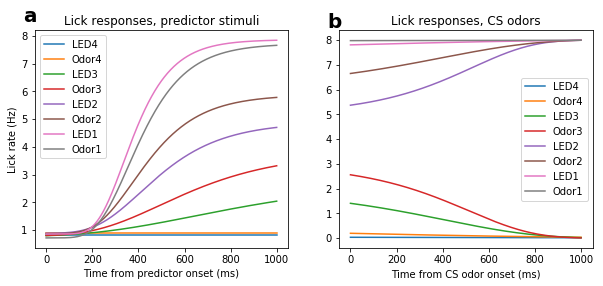

In [17]:
plt.figure(figsize=[10,4])
plt.subplot(121)

gompertzF = [0,0,2,3,4,5,7,7]
for i in np.arange(0,8):
    rnd = np.random.uniform(0.0075,.01);
    curve = rnd*90+gompertzF[i]*(np.exp(-2.5*np.exp(-(rnd)*gompertzF[i]*np.linspace(-30,100,1000))))
    plt.plot(curve,label=predStr[7-i])
plt.xlabel("Time from predictor onset (ms)")
plt.ylabel("Lick rate (Hz)")
plt.legend()
plt.title("Lick responses, predictor stimuli")
plt.text(-100, 8.5, "a", size=20, weight='bold')

plt.subplot(122)
# Gotta love the Gompertz function
gompertzF = [.25,.75,2,3,4,5,7,7]
for i in np.arange(0,4):
    rnd = np.random.uniform(0.0075,.01);
    curve = gompertzF[i]*(np.exp(-2.5*np.exp(-rnd*gompertzF[i]*np.linspace(-30,100,1000))))
    plt.plot(np.flipud(curve),label=predStr[7-i])

for i in np.arange(4,8):
    rnd = np.random.uniform(0.0075,.01);
    curve = gompertzF[7-i]*(np.exp(-2.5*np.exp(-(rnd)*gompertzF[7-i]*np.linspace(-30,100,1000))))
    plt.plot(np.flipud(-curve)+curve[0]+8,label=predStr[7-i])

plt.xlabel("Time from CS odor onset (ms)")
plt.legend()
plt.title("Lick responses, CS odors")
plt.text(-100, 8.5, "b", size=20, weight='bold')
plt.show()

#### Fig 3. Anticipatory behaviours reflect reward likelihood upon predictor presentation 
**a.** Average anticipatory licking rates associated with the different predictors. Rates reflect overall reward likelihoods associated with the predictor stimuli. Both rise time and max lick rate is higher for high reward probability predictors. **b.** Same as in **a** but for CS odors. Lick rates diverge after CS onset reflecting the learned likelihoods of rewards distributed across the CS odors.  
___

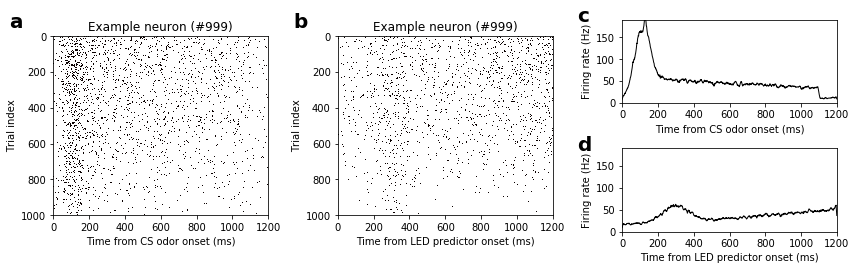

In [8]:
plt.figure(figsize=[12,7])

csSpikes = np.zeros([1000,1200],dtype=np.int8)
for i in range(0,1000):
    sel1 = np.random.choice(range(0,1200),np.random.randint(0,30))
    sel2 = np.random.choice(np.linspace(120,1099,970),np.random.randint(0,70), 
                            p=np.flipud(np.linspace(.5,1,970)/sum(np.linspace(.5,1,970))))
    sel3 = np.random.normal(110,40,np.random.randint(0,35))
    selT = np.concatenate((sel1,sel2,sel3))
    selT = selT.astype(int)
    csSpikes[i,selT]=1

plt.subplot2grid((4, 6), (0, 0), colspan=2,rowspan=2)
t = np.argsort(-np.sum(csSpikes,1))
plt.imshow(-csSpikes[t,0:],cmap="hot")
plt.ylabel("Trial index")
plt.xlabel("Time from CS odor onset (ms)")
plt.title("Example neuron (#999)")
plt.text(-250, -50, "a", size=20, weight='bold')

pSpikes = np.zeros([1000,1200],dtype=np.int8)
for i in np.arange(0,1000):
    sel1_1 = np.random.choice(range(0,1200),np.random.randint(0,80), 
                            p=np.sqrt(np.logspace(0,1,1200))/sum(np.sqrt(np.logspace(0,1,1200))))
    sel2_1 = np.random.normal(300,70,np.random.randint(0,15))
    selT_1 = np.concatenate((sel1_1,sel2_1))
    selT_1 = selT_1.astype(int)
    pSpikes[i,selT_1]=1

plt.subplot2grid((4, 6), (0, 2), colspan=2,rowspan=2)
tt = np.argsort(-np.sum(pSpikes,1))
plt.imshow(-pSpikes[tt,0:],cmap="hot")
plt.ylabel("Trial index")
plt.xlabel("Time from LED predictor onset (ms)")
plt.title("Example neuron (#999)")
plt.text(-250, -50, "b", size=20, weight='bold')

plt.subplot2grid((4, 6), (0, 4), colspan=2,rowspan=1)
zhat = np.sum(csSpikes,0)
zhat = np.convolve(zhat, np.ones(10)*.1, mode='same')
plt.plot(zhat,'k', linewidth=1)
plt.text(-250, 185, "c", size=20, weight='bold')
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Time from CS odor onset (ms)")
plt.axis([0,1200,0,190])

plt.subplot2grid((4, 6), (1, 4), colspan=2,rowspan=1)
yhat = np.sum(pSpikes,0)
yhat = np.convolve(yhat, np.ones(10)*.1, mode='same')
plt.plot(yhat,'k', linewidth=1)
plt.text(-250, 185, "d", size=20, weight='bold')
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Time from LED predictor onset (ms)")
plt.axis([0,1200,0,190])
plt.tight_layout()

plt.show()

#### Fig 4. Neural responses to CS odors and predictor stimuli  
**a.** Raster plot of piriform neurons' (rows) responses to a CS odor presentation (yes we'll get 1000 neurons in one recording obviously). Cells are sorted according to average firing rate. **b.** Same as in **a** but responses to an LED predictor stimulus presentation. **c.** Average population firing rate in response to CS stimuli. **d.** Average population firing rate in response to predictor stimulus.  
___
 

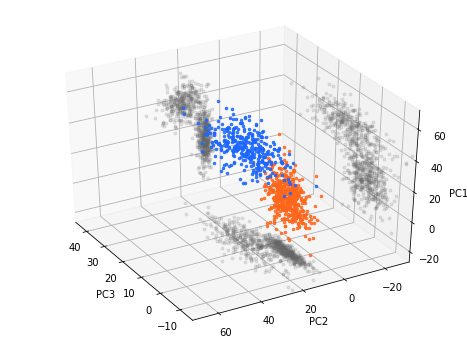

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(111, projection='3d')
pts = np.zeros([3,800])
rndP = np.array([[3,5,13,9],[9,2,19,5],[12,10,37,7]])
for i in range(0,3):
    pts[i,0:450] = np.random.normal(rndP[i,0],rndP[i,1],450)
    pts[i,450:] = np.random.normal(rndP[i,2],rndP[i,3],350)

ax.plot(pts[0,0:],pts[2,0:],'.',color=[.4,.4,.4],markersize=6,zdir="y",zs=-30,alpha=.15)
ax.plot(pts[1,0:],pts[2,0:],'.',color=[.4,.4,.4],markersize=6,zdir="x",zs=45,alpha=.15)
ax.plot(pts[0,0:],pts[1,0:],'.',color=[.4,.4,.4],markersize=6,zdir="z",zs=-25,alpha=.15)
ax.plot(pts[0,0:450],pts[1,0:450],pts[2,0:450],".",color=[1,.4,.1],markersize=5,alpha=.85)
ax.plot(pts[0,450:],pts[1,450:],pts[2,450:],".",color=[.1,.4,1],markersize=5,alpha=.85)

ax.set_xlim([-15,45])
ax.set_ylim([-30,70])
ax.set_zlim([-25,70])
ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
ax.set_zlabel("PC1")
ax.view_init(35, 150)
plt.show()

#### Fig 5. Neural population responses differ between rewarded and unrewarded CS odors  
Scatter plot of 3 principal components of neural responses across CS odors. Neural representations of CS odors separate into two distinct main clusters in PCA space (blue dots correspond to rewarded stimuli, red unrewarded), reflecting rewarded and unrewarded CS odors.
___

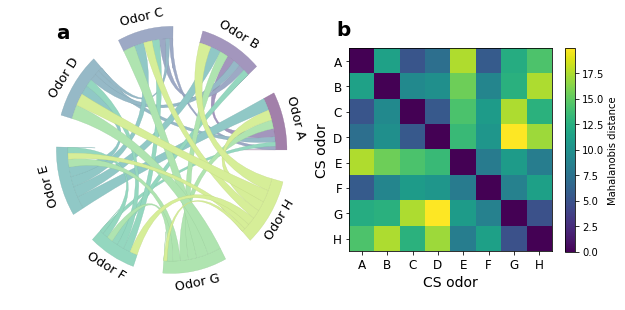

In [14]:
from matplotlib_chord import chordDiagram
from matplotlib import cm
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(121)
flux = np.random.normal(4,1.5,[8,8])
flux = flux + flux.T
flux[4:,0:4] = flux[4:,0:4]*1.5+3
flux[0:4,4:] = flux[0:4,4:]*1.5+3
np.fill_diagonal(flux,0)

cmapT = plt.cm.viridis
cmapT = [cmapT(i) for i in np.arange(0,cmapT.N/32)*32]
cmapT = np.reshape([i for j in cmapT for i in j],[8,4])/2

nodePos = chordDiagram(flux, ax,chordwidth=.6,width=0.1,pad=15,colors=cmapT)
ax.axis('off')
#plt.title("Pair-wise cluster distances between CS odor representations",size=13,pad=19)
prop = dict(fontsize=16*0.8, ha='center', va='center')
nodes = ["Odor A","Odor B","Odor C","Odor D","Odor E","Odor F","Odor G","Odor H",]
for i in range(8):
    ax.text(nodePos[i][0], nodePos[i][1] ,nodes[i],rotation=nodePos[i][2], **prop)
plt.text(-1, .9, "a", size=20, weight='bold')
    
plt.subplot(122)
plt.imshow(flux,cmap="viridis")
plt.colorbar(shrink=.75,label="Mahalanobis distance")
plt.yticks(range(0,8),csStr,fontsize=12)
plt.xticks(range(0,8),csStr,fontsize=12)
plt.xlabel("CS odor",fontsize=14)
plt.ylabel("CS odor",fontsize=14)
plt.text(-1, -1, "b", size=20, weight='bold')
plt.show()

#### Fig 6. CS odor representations in piriform are distinct and decodable  
**a.** Chord diagram showing relative pair-wise Mahalanobis distances between neural representations of 
the CS odors (A-H). **b.** The same data as left, but presented in matrix form. Note the diagonal block structures indicating stronger separation between CS odors with different reward contingencies.
___

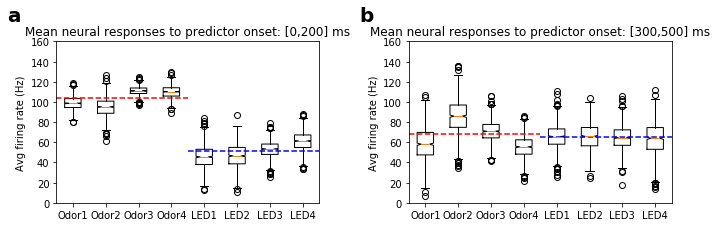

In [228]:
fData = np.zeros([1000,8])
for i in range(4,8):
    fData[0:,i] = np.random.normal(np.random.randint(30)+40,np.random.randint(10)+4,1000)
for i in range(0,4):
    fData[0:,i] = np.random.normal(np.random.randint(35)+80,np.random.randint(8)+4,1000)
plt.figure(figsize=[10,3])
plt.subplot(121)
plt.boxplot(fData, 1)
avgRO = np.mean(np.mean(fData[0:,0:4],0))
plt.plot([0,4.5],[avgRO,avgRO],'r--')
avgRL = np.mean(np.mean(fData[0:,4:8],0))
plt.plot([4.5,9],[avgRL,avgRL],'b--')
plt.xticks(range(1,9),predStr[::2]+predStr[1::2],fontsize=10)
plt.ylabel("Avg firing rate (Hz)")
plt.title("Mean neural responses to predictor onset: [0,200] ms")
plt.ylim([0,160])
plt.text(-1,180,"a",size=20,weight="bold")

ffData = np.zeros([1000,8])
for i in range(0,8):
    ffData[0:,i] = np.random.normal(np.random.randint(45)+55,np.random.randint(8)+10,1000)
plt.subplot(122)
plt.boxplot(ffData, 1)
avgRO = np.mean(np.mean(ffData[0:,0:4],0))
plt.plot([0,4.5],[avgRO,avgRO],'r--')
avgRL = np.mean(np.mean(ffData[0:,4:8],0))
plt.plot([4.5,9],[avgRL,avgRL],'b--')
plt.xticks(range(1,9),predStr[::2]+predStr[1::2],fontsize=10)
plt.ylabel("Avg firing rate (Hz)")
plt.title("Mean neural responses to predictor onset: [300,500] ms")
plt.ylim([0,160])
plt.text(-1,180,"b",size=20,weight="bold")

plt.tight_layout()
plt.show()

#### Fig 7. Differences in neural activation to predictive odors vs visual stimuli decrease with time from predictor onset  
**a.** Boxplots of average piriform firing rates in response to predictor stimuli. Means for all odors and LED predictors are shown as colored dashed lines (red and blue respectively). Odor predictors compared to visual predictors consistently resulted in stronger activation of piriform ensembles, but only in the immediate perdiod after predictor onset ([0,200] ms). **b.** Boxplots as in **a** but at a later time interval ([300,500] ms). Within 500 ms, these differences gave way to equal activation levels across predictor type.
___

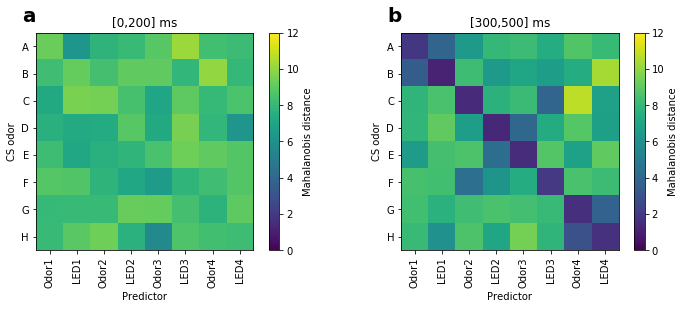

In [63]:
predCSmat = np.random.normal(8,1,[8,8])
for i in range(0,8):
    predCSmat[i,i]=predCSmat[i,i]/5.
    predCSmat[i,lowProb[i]] = predCSmat[i,lowProb[i]]/2.
plt.figure(figsize=[12,4])
plt.subplot(122)
plt.imshow(predCSmat)
plt.xticks(range(0,8),predStr,rotation='vertical')
plt.yticks(range(0,8),csStr)
plt.colorbar(label="Mahalanobis distance")
plt.clim(vmin= 0,vmax=12)
plt.title("[300,500] ms")
plt.ylabel("CS odor")
plt.xlabel("Predictor")
plt.text(-1,-.9,"b",size=20,weight="bold")

predCSmatE = np.random.normal(8,1,[8,8])
plt.subplot(121)
plt.imshow(predCSmatE)
plt.xticks(range(0,8),predStr,rotation='vertical')
plt.yticks(range(0,8),csStr)
plt.colorbar(label="Mahalanobis distance")
plt.title("[0,200] ms")
plt.ylabel("CS odor")
plt.xlabel("Predictor")
plt.clim(vmin= 0,vmax=12)
plt.text(-1,-.9,"a",size=20,weight="bold")
plt.show()

#### Fig 8. Neural representations progressively resemble predicted CS odors after predictor onset  
**a.** Pair-wise cluster separation between neural reponses to predictors vs CS odors. Within the first 200 ms after predictor onset, neural population responses are distinct from the associated CS odor representations. **b.** Same as in **a** but at a later time point ([300,500] ms). Note the increased similarity between predictor-CS odor pairs reflecting their joint probability distribution shown in Fig 2a.
___

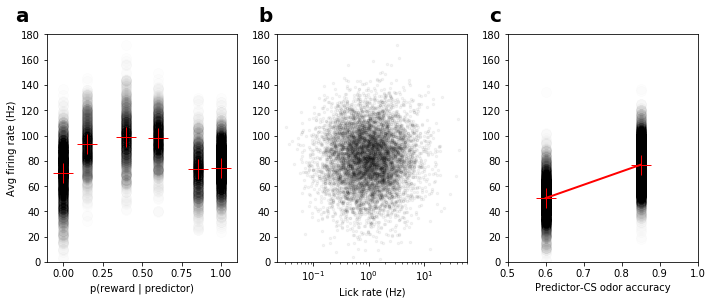

In [241]:
plt.figure(figsize=[10,4])
rData = np.zeros([1000,8])
mData =[]
for i in range(0,8):
    rData[0:,i] = np.random.normal(np.random.randint(45)+55,np.random.randint(8)+16,1000)
    mData.append(np.mean(rData[0:,i]))
plt.subplot(131)
ttp = np.repeat(np.matmul(probMat,testMat),1000,1)
plt.plot(ttp.T,rData,'k.',markersize=20,alpha=.0065)
mData[1] = np.mean(mData[0:1])
mData[-2] = np.mean(mData[-2:])
for i in range(1,7):
    plt.plot(ttp[i,1],mData[i],'+r',markersize=20)
avgRr = np.mean(np.mean(rData[0:,0:4],0))
plt.ylabel("Avg firing rate (Hz)")
plt.xlabel("p(reward | predictor)")
plt.xlim([-.1,1.1])
plt.ylim([0,180])
plt.text(-.3,190,"a",size=20,weight="bold")

plt.subplot(132)
plt.semilogx(np.random.lognormal(.01,1,[1000,8]),rData,'.k',markersize=5,alpha=.045)
plt.text(.01,190,"b",size=20,weight="bold")
plt.ylim([0,180])
plt.xlabel("Lick rate (Hz)")

plt.subplot(133)
tmpR = np.random.normal(77,15,5000)
tmpR2 = np.random.normal(50,17,2000)
plt.plot(np.zeros(5000)+.85,tmpR,'.k',markersize=20,alpha=.0065)
plt.plot(np.zeros(2000)+.6,tmpR2,'.k',markersize=20,alpha=.0065)
plt.errorbar([.6,.85],[np.mean(tmpR2[:]),np.mean(tmpR[:])],color='r',linewidth=2)
plt.plot([.6,.85],[np.mean(tmpR2[:]),np.mean(tmpR[:])],"r+",markersize=20)
plt.ylim([0,180])
plt.xlim([.5,1])
plt.xlabel("Predictor-CS odor accuracy")
plt.text(.45,190,"c",size=20,weight="bold")

plt.tight_layout()
plt.show()

#### Fig 9. Variation in population responses to predictors are not well explained by conditional reward likelihoods, nor anticipatory licking rates  
**a.** Scatter plot of mean firing rate during predictor presentation as a function of upcoming reward likelihood. Means per likelihood step is shown as red crosses. **b.** Scatter plot of mean firing rate during predictor presentation as a function of anticipatory lick rates. **c.** Scatter plot of mean firing rate during predictor presentation as a function of predictor-CS odor accuracy. Firing rates reflect the reliability with which a predictor signals the upcoming CS odor.
___

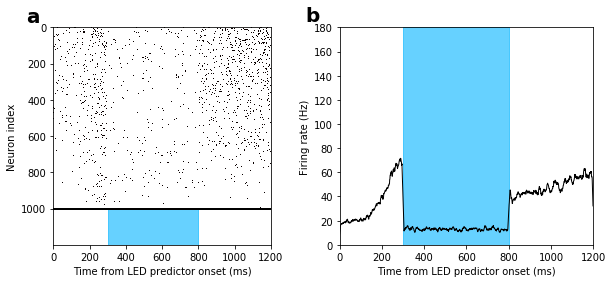

In [322]:
plt.figure(figsize=[10,4])

pSpikes = np.zeros([1000,1200],dtype=np.int8)
for i in np.arange(0,1000):
    sel1 = np.random.choice(np.linspace(0,1199,1200),np.random.randint(0,90), 
                            p=np.sqrt(np.logspace(0,1,1200))/sum(np.sqrt(np.logspace(0,1,1200))))
    sel2 = np.random.normal(300,70,np.random.randint(0,18))
    sel3 = np.random.choice(np.linspace(300,799,500),np.random.randint(0,14))
    selT = np.concatenate((sel1,sel2))
    selT = selT.astype(int)    
    sel3 = sel3.astype(int)
    pSpikes[i,selT]=1
    pSpikes[i,300:800] = 0
    pSpikes[i,sel3]=1

plt.subplot(121)
tt = np.argsort(-np.sum(pSpikes,1))
plt.imshow(-pSpikes[tt,0:],cmap="hot")
plt.ylabel("Neuron index")
plt.xlabel("Time from LED predictor onset (ms)")
plt.ylim([1200,0])
plt.yticks(range(0,1001,200))
plt.text(-150, -30, "a", size=20, weight='bold')
plt.axvspan(300, 800, ymax=.17,alpha=0.6, color=[0,.7,1])
plt.axhline(1000,linewidth=2, color='k')

plt.subplot(122)
yhat = np.sum(pSpikes,0)
yhat = np.convolve(yhat, np.ones(10)*.1, mode='same')
plt.plot(yhat,'k', linewidth=1)
plt.text(-160, 185, "b", size=20, weight='bold')
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Time from LED predictor onset (ms)")
plt.axis([0,1200,0,180])
plt.axvspan(300, 800,alpha=0.6, color=[0,.7,1])

plt.show()

#### Fig 10. 5-HT inhibits top down responses in piriform
**a.** Raster plot of piriform neurons during an LED predictor stumulus ([0,1000] ms). 5-HT is activated optogenetically (blue bar), resulting in fast and marked reduction in activation. **b.** Average firing rate response to the data in **a**.
___

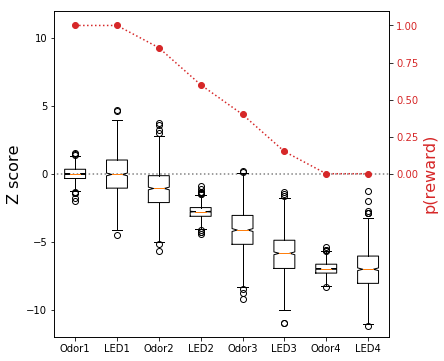

In [338]:
fData = np.zeros([1000,8])
gmg = np.matmul(probMat,testMat)
for i in range(0,8):
    fData[0:,i] = np.random.normal(gmg[i]*7-7,np.random.randint(2)+.5,1000)
fig = plt.figure(figsize=[6,6])
plt.boxplot(fData, 1)
plt.xticks(range(1,9),predStr,fontsize=10)
plt.ylabel("Z score",size=16)
plt.ylim([-12,12])
plt.plot([0,9],[0,0],'k:',alpha=.5)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('p(reward)',size=16,color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,9), gmg,':o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yticks(np.linspace(0,1,5))
ax2.set_ylim([-1.1,1.1])
plt.show()

#### Fig 11. 5-HT modulation of top down signals in piriform cortex scale with reward expectation
Box plot show effect size of 5-HT activation on piriform responses across predictor stimuli (Z score). The second (red) axis and line plot displays p(reward) for each of the predictors.
___

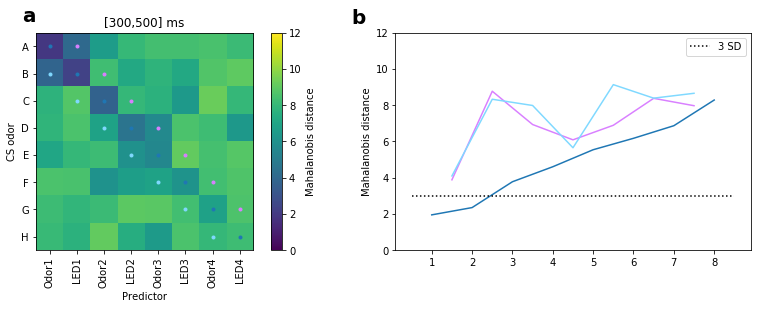

In [142]:
predMask = np.zeros([8,8])
for i in range(0,8):
    for j in range(0,8):
        predMask[i,j] = (i+j)/14.
plt.figure(figsize=[14,4])
plt.subplot(121)
predMash = predMask*predCSmatE+predCSmat*predMask[::-1,::-1]
plt.imshow(predMash)
plt.xticks(range(0,8),predStr,rotation='vertical')
plt.yticks(range(0,8),csStr)
plt.colorbar(label="Mahalanobis distance")
plt.clim(vmin= 0,vmax=12)
plt.title("[300,500] ms")
plt.ylabel("CS odor")
plt.xlabel("Predictor")
plt.text(-1,-.9,"a",size=20,weight="bold")
plt.plot(range(1,8),range(0,7),'.',color=[0.85,0.5,1])
plt.plot(range(0,7),range(1,8),'.',color=[0.5,0.85,1])
plt.plot(range(0,8),range(0,8),'.')

xax = range(1,8)
plt.subplot(122)
plt.plot(range(1,9),np.diag(predMash))
plt.plot(np.asarray(range(2,9))-0.5,np.diag(predMash[1:,0:-1]),color=[0.85,0.5,1])
plt.plot(np.asarray(range(2,9))-0.5,np.diag(predMash[0:-1,1:]),color=[0.5,0.85,1])
plt.ylim([0,12])
#plt.xticks(range(0,8),predStr,rotation='vertical')
plt.ylabel("Mahalanobis distance")
plt.plot([.5,8.5],[3,3],':k',label="3 SD")
plt.text(-1,12.5,"b",size=20,weight="bold")
plt.legend()
plt.show()

#### Fig 12. Cluster distances between predictors and CS odors in response to 5-HT activation

___